In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot_white.mplstyle")

## Read data


In [2]:
data = pandas.read_csv("InteractionLogs-211010-153741.csv")
data.head()

,frame_no,user_position,user_orientation,camera_hit_obj,camera_hit_point,camera_hit_dist,controller_hit_obj,controller_hit_point,controller_hit_distance
0,10,"(-10.53,2.79,-9.97)","(0.00,0.00,1.00)",Wall North,"(-10.53,2.79,12.25)",22.22,Wall North,"(-10.52,2.78,12.25)",21.82
1,20,"(-10.53,2.79,-9.97)","(0.00,0.00,1.00)",Wall North,"(-10.53,2.79,12.25)",22.22,Wall North,"(-10.52,2.78,12.25)",21.82
2,30,"(-10.53,2.79,-9.97)","(0.00,0.00,1.00)",Wall North,"(-10.53,2.79,12.25)",22.22,Wall North,"(-10.52,2.78,12.25)",21.82
3,40,"(-10.53,2.79,-9.97)","(0.00,0.00,1.00)",Wall North,"(-10.53,2.79,12.25)",22.22,Wall North,"(-10.52,2.78,12.25)",21.82
4,50,"(-10.53,2.79,-9.97)","(0.00,0.00,1.00)",Wall North,"(-10.53,2.79,12.25)",22.22,Wall North,"(-10.52,2.78,12.25)",21.82


In [3]:
def split_coords_series(series: pandas.Series) -> pandas.DataFrame:
    name = series.name

    return (
        series.apply(lambda x: x[1:-1])
        .str.split(",", expand=True)
        .rename(columns={0: f"{name}_x", 1: f"{name}_y", 2: f"{name}_z"})
    )

## Extract coordinates

- user position
- camera hit point
- controller hit point

In [4]:
user_position = split_coords_series(data["user_position"])
cam_hit_point = split_coords_series(data["camera_hit_point"])
controller_hit_point = split_coords_series(data["controller_hit_point"])


In [5]:
user_position.head()

,user_position_x,user_position_y,user_position_z
0,-10.53,2.79,-9.97
1,-10.53,2.79,-9.97
2,-10.53,2.79,-9.97
3,-10.53,2.79,-9.97
4,-10.53,2.79,-9.97


In [6]:
cam_hit_point.head()

,camera_hit_point_x,camera_hit_point_y,camera_hit_point_z
0,-10.53,2.79,12.25
1,-10.53,2.79,12.25
2,-10.53,2.79,12.25
3,-10.53,2.79,12.25
4,-10.53,2.79,12.25


In [7]:
controller_hit_point.head()

,controller_hit_point_x,controller_hit_point_y,controller_hit_point_z
0,-10.52,2.78,12.25
1,-10.52,2.78,12.25
2,-10.52,2.78,12.25
3,-10.52,2.78,12.25
4,-10.52,2.78,12.25


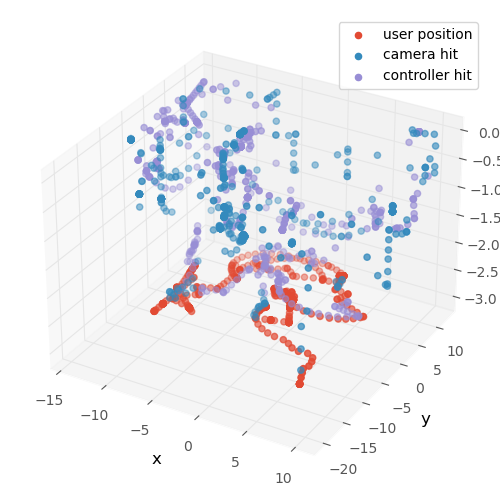

In [8]:
%matplotlib widget
from typing import Tuple
from mpl_toolkits import mplot3d


def coords_to_np_array(df: pandas.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Transform Unity's coordinate system into matplotlib's equivalent

    Args:
        df (pandas.DataFrame): DataFrame which holds the x, y, and z coordinates in Unity's 3D format

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: Three numpy arrays representing the 3D coordinate in matplotlib's 3D system
    """
    return (
        np.array(df.iloc[:, 0], dtype=float),
        np.array(df.iloc[:, 2], dtype=float),
        -np.array(df.iloc[:, 1], dtype=float),
    )


user_x, user_y, user_z = coords_to_np_array(user_position)
cam_x, cam_y, cam_z = coords_to_np_array(cam_hit_point)
controller_x, controller_y, controller_z = coords_to_np_array(controller_hit_point)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.scatter3D(user_x, user_y, user_z, label="user position")
ax.scatter3D(cam_x, cam_y, cam_z, label="camera hit")
ax.scatter3D(controller_x, controller_y, controller_z, label="controller hit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()
plt.tight_layout()